# Linear Production Model

This notebook demonstrates the use of linear programming to maximize profit for a simple model of a multiproduct production facility. The notebook uses [Pyomo](http://www.pyomo.org/) to represent the model with the [glpk](https://en.wikibooks.org/wiki/GLPK) solver to calculate solutions.

## Example: Production Plan for a Single Product Plant

Suppose you are thinking about starting up a business to produce Product X. You have determined there is a market for X of up to 40 units per week at a price of \$270 each. The production of each unit requires \$100 of raw materials, 1 hour of type A labor, and 2 hours of type B labor. You have an unlimited amount of raw material available to you, but only 80 hours per week of labor A at a cost of \$50/hour, and 100 hours per week of labor B at a cost of \$40 per hour. Ignoring all other expenses, what is the maximum weekly profit?

To get started on this problem, we sketch a flow diagram illustrating the flow of raw materials and labor through the production plant.

![LP_ProductX.png](./figures/LP_ProductX.png)

The essential decision we need to make is how many units or Product X to produce each week. That's our *decision variable* which we denote as $x$. The weekly revenues are then

$$ \mbox{Revenue} = \$270 x $$

The costs include the value of the raw materials and each form of labor. If we produce x units a week, then the total cost is

$$ \mbox{Cost} = \underbrace{\$100 x}_{\mbox{Raw Material}} 
    + \underbrace{\$50 x}_{\mbox{Labor A}} + \underbrace{2\times\$40 x}_{\mbox{Labor B}} = \$230 x$$
    
We see immediately that the gross profit is just

$$\begin{eqnarray*}\mbox{Profit} & = & \mbox{Revenue} - \mbox{Cost} \\
& = & \$270x - \$230x \\
& = & \$40 x
\end{eqnarray*}$$

which means there is a profit earned on each unit of X produced, so let's produce as many as possible. 

There are three constraints that limit how many units can be produced. There is market demand for no more than 40 units per week. Producing $x = 40$ units per week will require 40 hours per week of Labor A, and 80 hours per week of Labor B. Checking those constraints we see that we have enough labor of each type, so the maximum profit will be

$$\max \mbox{Profit} = $40 \mbox{ per unit} \times 40 \mbox{ units per week} = \$1600 \mbox{ per week}$$

What we conclude is that market demand is the 'most constraining constraint.' Once we've made that deduction, the rest is a straightforward problem that can be solved by inspection.  

### Mathematical Model

Even though this example has a straightforward solution, it is useful to consider how it can be represented mathematically, and solved using typical tools for linear programming.

The mathematical representation consists of a single non-negative decision variable, $x$, an objective function, and a set of linear constraints.  Here we include all constraints even though we know only one of them -- the most 'constraining constraint' -- will be active.

\begin{align}
\max_{x \geq 0} &\ 40\ x  & \mbox{objective}\\
\mbox{subject to:}\qquad \\
x & \leq 40  & \mbox{demand constraint} \\
x & \leq 80  & \mbox{labor A constraint} \\
2\ x & \leq 100 & \mbox{labor B constraint}
\end{align}

All of these constraints must be satisfied, therefore the demand constraint is the 'most constrainting'. Again, the maximum value of $x$ is 40, so the maximum profit is $\$ 40 \times 40 = \$1,600$.

### Exercises

1. Suppose the demand could be increased to 50 units per month. What would be the increased profits?  What if the demand increased to 60 units per month?  How much would you be willing to pay for your marketing department for the increased demand?

2. Increase the cost of LaborB. At what point is it no longer financially viable to run the plant?

## Production Plan: Product Y

Your marketing department has developed plans for a new product called Y. The product sells at a price of \\$210 each, and they expect that you can sell all that you can make. It's also cheaper to make, requiring only \\$90 in raw materials, 1 hour of Labor type A at \\$50 per hour, and 1 hour of Labor B at \\$40 per hour. What is the potential weekly profit?

![LP_ProductY.png](./figures/LP_ProductY.png)

The analysis proceeds in the same form as Product X. In this case the revenue is given by

$$ \mbox{Revenue} = \$210 y $$

The total cost is

$$ \mbox{Cost} = \underbrace{\$90 x}_{\mbox{Raw Material}} 
    + \underbrace{\$50 x}_{\mbox{Labor A}} + \underbrace{\$40 x}_{\mbox{Labor B}} = \$180 x$$
    
The gross profit is thn

\begin{eqnarray}\mbox{Profit} & = & \mbox{Revenue} - \mbox{Cost} \\
& = & \$210x - \$180x \\
& = & \$30 x
\end{eqnarray}

We see the profit per unit of Y is smaller. So a decision to produce Y instead of X must be based on the ability to make Y in larger quantities.

The mathematical formulation of this problem becomes

\begin{align}
\max_{y \geq 0} &\ 30\ y  & \mbox{objective}\\
\mbox{subject to:}\qquad \\
y & \leq 80  & \mbox{labor A constraint} \\
y & \leq 100 & \mbox{labor B constraint}
\end{align}

Compared to product X, we can manufacture and sell up 80 units per week for a total profit of \$2,400. This is very welcome news. 

### Exercises

1. What is the limiting resource?  That is, which of the two types of labor limits the capacity of your plant to produce more units of Y?

2. What rate would you be willing to pay for the additional labor necessary to increase the production of Y?

## Production Plan: Mixed Product Strategy

So far we have learned that we can make \\$1,600 per week by manufacturing product X, and \\$2,400 per week manufacturing product Y.  Is it possible to do even better?

To answer this question, we consider the possibilty of manufacturing both products in the same plant. The marketing department assures us that product Y will not affect the sales of product X.  So the same constraints hold as before, but now we have two decision variables, $x$ and $y$.

![LP_ProductXY.png](./figures/LP_ProductXY.png)

Mathematical formulation

\begin{align}
\max_{x,y \geq 0} &\ 40\ x + 30\ y  & \mbox{objective}\\
\mbox{subject to:}\qquad \\
x & \leq 40  & \mbox{demand constraint} \\
x + y & \leq 80  & \mbox{labor A constraint} \\
2x + y & \leq 100 & \mbox{labor B constraint}
\end{align}

## Solution using scipy.optimize.linprog

The [scipy.optimize library](https://docs.scipy.org/doc/scipy/reference/optimize.html) includes a comprehensive collection of functions for finding roots and minimizing systems of one or more equations. Given a new problem, this library is often a good place to look for tools needed to solve a system of equations, or to minimize a particular objective.

In particular, the function `scipy.optimize.linprog` solves linear programming problems represented in the form

\begin{align}
\min_{x \geq 0} &\ c^T x \\
\mbox{subject to:}\qquad \\
A_{ub} & \leq b_{ub} \\
A_{eq} & = b_{eq} \\
\end{align}

where $c$ is a vector of coefficients in the objective function to be minimized, $A_{ub}$ and $b_{ub}$ are the coefficients and right-hand-sides of problem constraints written as upper bounds, and $A_{eq}$ and $b_{eq}$ are coefficients and right-hand-sides for equality constraints.

In [1]:
from scipy.optimize import linprog

c = [-40, -30]

A_ub = [[1, 0], 
        [1, 1], 
        [2, 1]]

b_ub = [40, 
        80, 
        100]

results = linprog(c, A_ub, b_ub)

print(results.message)
if results.success:
    print('x =', results.x)
    print('objective = ', results.fun)

Optimization terminated successfully.
x = [19.99999999 59.99999998]
objective =  -2599.999998967465


The mixed product strategy earns more profit than either of the single product srategies. Does this surprise you?  Before going further, try to explain why it is possible for a mixed product strategy to earn more profit than either of the possible single product strategies.

## What are the active constraints?

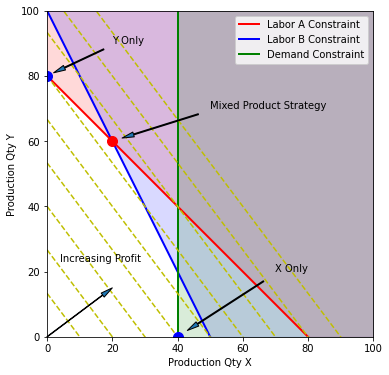

In [2]:
%matplotlib inline
from pylab import *

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,100,0,100])
xlabel('Production Qty X')
ylabel('Production Qty Y')

# Labor A constraint
x = array([0,80])
y = 80 - x
plot(x,y,'r',lw=2)
fill_between([0,80,100],[80,0,0],[100,100,100],color='r',alpha=0.15)

# Labor B constraint
x = array([0,50])
y = 100 - 2*x
plot(x,y,'b',lw=2)
fill_between([0,50,100],[100,0,0],[100,100,100],color='b',alpha=0.15)

# Demand constraint
plot([40,40],[0,100],'g',lw=2)
fill_between([40,100],[0,0],[100,100],color='g',alpha=0.15)

legend(['Labor A Constraint','Labor B Constraint','Demand Constraint'])

# Contours of constant profit
x = array([0,100])
for p in linspace(0,3600,10):
    y = (p - 40*x)/30
    plot(x,y,'y--')

# Optimum
plot(20,60,'r.',ms=20)
annotate('Mixed Product Strategy', xy=(20,60), xytext=(50,70),
         arrowprops=dict(shrink=.1,width=1,headwidth=5))

plot(0,80,'b.',ms=20)
annotate('Y Only', xy=(0,80), xytext=(20,90),
         arrowprops=dict(shrink=0.1,width=1,headwidth=5))

plot(40,0,'b.',ms=20)
annotate('X Only', xy=(40,0), xytext=(70,20),
         arrowprops=dict(shrink=0.1,width=1,headwidth=5))

text(4,23,'Increasing Profit')
annotate('', xy=(20,15), xytext=(0,0),
         arrowprops=dict(width=0.5,headwidth=5))

savefig('figures/LPprob01.png', bbox_inches='tight')

## What is the incremental value of labor?

The optimal solution is found at the intersection of constraints corresponding to Labor A and Labor B.  These are the **active constraints**. Adding additional labor of either type will increase the profit.  By contrast, the demand constraint for product X is inactive at the optimum, therefore attempting to increase demand for product X would be wasted effort.

This leaves the important question of how much the profit will increase if additional resources are available. Let's see what happens if one additional hour of Labor A is available.

In [4]:
from scipy.optimize import linprog

c = [-40, -30]

A_ub = [[1, 0], 
        [1, 1], 
        [2, 1]]

b_ub = [40,
        81,    #  <<<<<< 1 additional hour of Labor A
        100]

results = linprog(c, A_ub, b_ub)

print(results.message)
if results.success:
    print('x =', results.x)
    print('objective = ', results.fun)

Optimization terminated successfully.
x = [18.99999999 61.99999997]
objective =  -2619.999998864241


An additional hour of Labor A increases the profit by \$20. The base cost of \$50/hour for Labor A is included in the objective function. Therefore we should be willing to pay up to \$50 + \$20 = \$70/hour for additional Labor A.

### Exercise

1. What is the incremental value of Labor B?

## Theory of Constraints

* For $n$ decisions you should expect to find $n$ 'active' constraints.
* Each inactive constraint has an associated 'slack.'  The associated resources have no incremental value.
* Each active constraint has an associated 'shadow price'.  This is additional value of additional resources.